In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial, exp
from mpl_toolkits import mplot3d

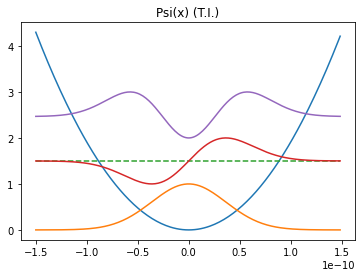

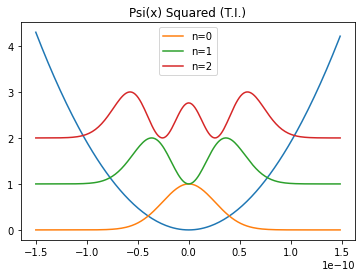

In [14]:
x = np.arange(-15.0e-11, 15.0e-11, 0.15e-11)
h_bar = 6.626e-34/(2*np.pi) #modified plank's constant (J*s) 
m = 1.660540199e-27 #mass (kg)
c = 2.998e8 #speed of light (m/s)
w = float(c*1600e2) #angular velocity (1/s)?
Xi = np.sqrt((m*w) / h_bar)*x #dimensionless
H = [1+(Xi*0), 2*Xi, 4*(Xi**2)-2]
waves = []
constant = (m*w/(np.pi*h_bar))**1/4 #dimensionless

#harmonic potential
potential = 0.5*m*(w**2)*(x**2)*(10**20)

#regular wavefunctions
for n in range(len(H)):
    wave = []
    for i in range(len(Xi)):
        wave_val = (constant)*(1/np.sqrt((2**n)*(factorial(n))))*H[n][i]*np.exp((-Xi[i]**2)/2)
        wave.append(wave_val)    
    waves.append(wave)

#squaring the time independent wavefunctions
waves_squared = []
for i in range(len(waves)):
    wave_squared = [num**2 for num in waves[i]]
    waves_squared.append(wave_squared)

rows = len(waves)
columns = len(waves[0])
waves_n = [[0 for j in range(columns)] for i in range(rows)]
waves_squared_n = [[0 for j in range(columns)] for i in range(rows)]

#now that we have the squared our wavefunctions, we can then normalize them
for i in range(len(waves_squared)):
    for j in range(len(waves_squared[i])):
        waves_squared_n[i][j] = ((waves_squared[i][j] - min(waves_squared[i])) / (max(waves_squared[i]) - min(waves[i])))+i
                
for i in range(len(waves)):
    for j in range(len(waves[i])):
        waves_n[i][j] = ((waves[i][j] - min(waves[i])) / (max(waves[i]) - min(waves[i])))+i

line = [1.5 for _ in range(len(x))]        

#normalized plots
plt.plot(x, potential)
plt.plot(x, waves_n[0], label='n=0')
plt.plot(x, line, ls='--')
plt.plot(x, waves_n[1], label='n=1')
plt.plot(x, waves_n[2], label='n=2')
plt.title('Psi(x) (T.I.)')
plt.show()

plt.plot(x, potential)
plt.plot(x, waves_squared_n[0], label='n=0')
plt.plot(x, waves_squared_n[1], label='n=1')
plt.plot(x, waves_squared_n[2], label='n=2')
plt.title('Psi(x) Squared (T.I.)')
plt.legend()
plt.show()

# #Now we add the time component and normalization
# i = 1j
# A = np.sqrt(29) #normalization constant
# t = np.arange(0, 100e-15, 0.5e-15) #fs scale
# print('length of t:',len(t))
# print('length of x:',len(x)) #ensuring same lengths

# #t = np.arange(0, 100e-15, len(x)) #fs scale
# E = [0.5*h_bar*w, 1.5*h_bar*w, 2.5*h_bar*w] #Energies at each level n
# t_comps = []
# t_comp_cons = []

# #filling in the vectors for the time component of our wavefucntion
# for index in range(len(E)):
#     t_comp = []
#     t_comp_con = []
#     for j in range(len(t)):
#         val = np.exp(-(i*E[index]*t[j])/h_bar)
#         val_con = np.exp(-(-i*E[index]*t[j])/h_bar)
#         t_comp.append(val)
#         t_comp_con.append(val_con)
#     t_comps.append(t_comp)
#     t_comp_cons.append(t_comp_con)

# TD_wave = []
# for j in range(len(waves_n[0])):
#     TD_wave_part = []
#     for y in range(len(t_comps[0])):
#             TD_wave_val = ((3/A)*waves_n[0][j]*t_comps[0][y]) - ((2/A)*waves_n[1][j]*t_comps[1][y]) + (((4*i)/A)*waves_n[2][j]*t_comps[2][y])
#             TD_wave_val = np.abs(TD_wave_val)
#             TD_wave_part.append(TD_wave_val)
#     TD_wave.append(TD_wave_part)
    
# #converting from list to array for plotting
# TD_wave = np.array(TD_wave)
# TD_wave_squared = np.power(TD_wave, 2)

# # Now lets make the 3-D and Contour plots :)
# fig = plt.figure(figsize = (15,15))
# ax = plt.axes(projection='3d')
# X, T = np.meshgrid(x, t)

# surf = ax.plot_surface(X, T, TD_wave_squared, cmap = plt.cm.cividis)
# ax.set_xlabel(r'$x$', labelpad=1)
# ax.set_ylabel(r'$t$', labelpad=1)
# ax.set_zlabel(r'\Psi(x,t)', labelpad=20)
# plt.show()


# plt.contourf(X,T,TD_wave_squared)
# plt.colorbar()
# plt.xlabel(r'$x$')
# plt.ylabel(r'$t$')
# plt.title('Contour Plot')

# plt.show()